# **Data Sampling self learning project: Data Scraping from IMDB website**

This project demonstrates web scraping techniques to extract movie data from IMDB's "Most Popular Movies" chart. Below is the step-by-step implementation with explanations:

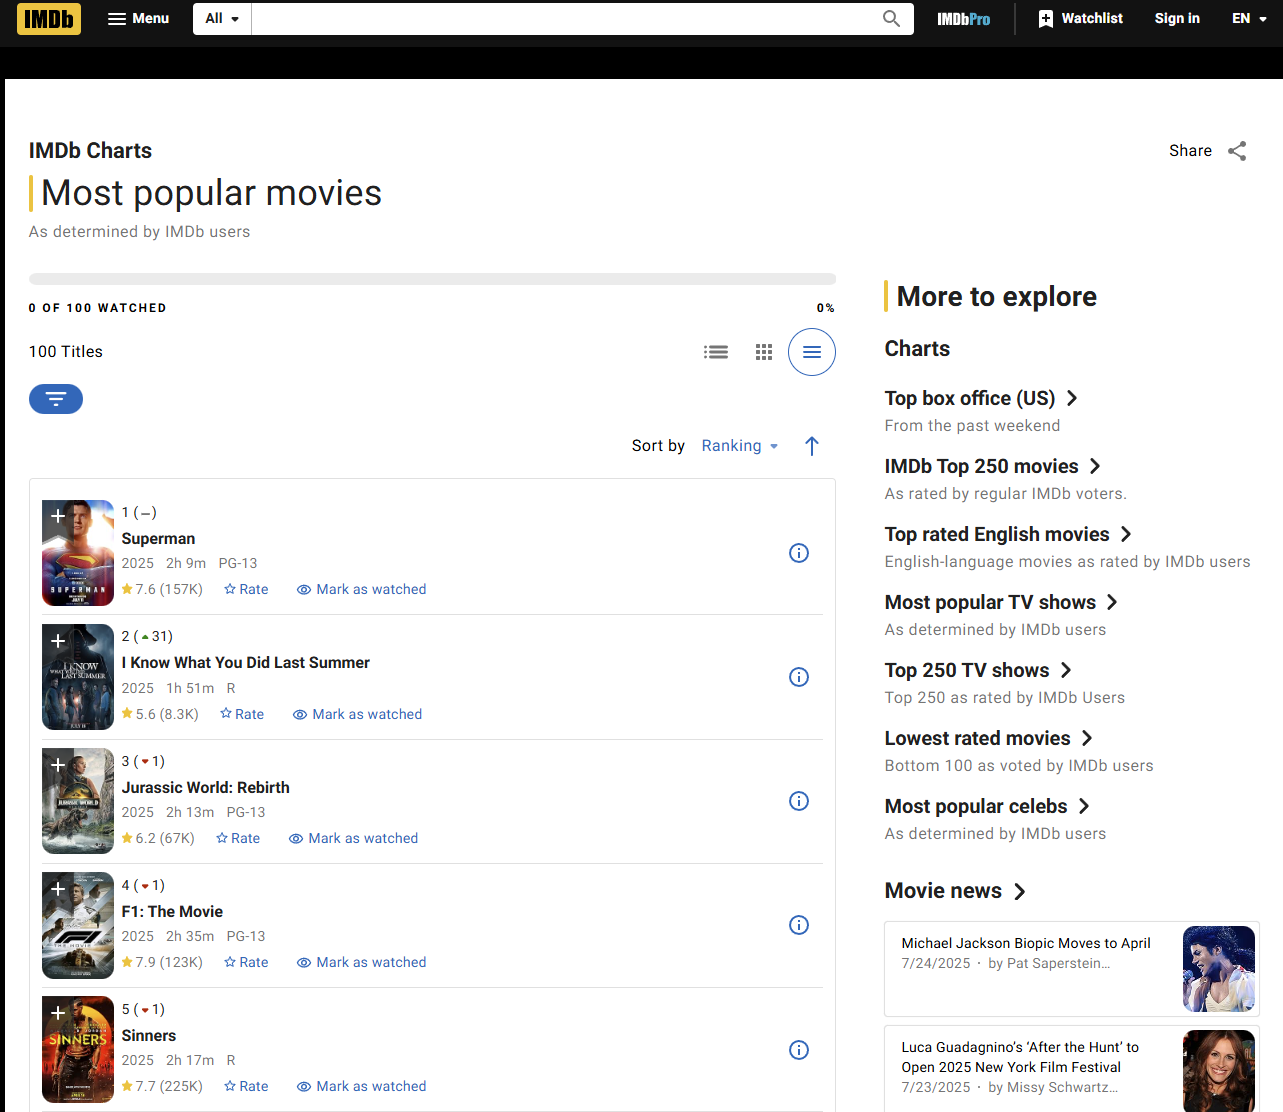

 Setup and Installation

In [ ]:
%pip install requests beautifulsoup4



*   requests: For making HTTP requests to websites
*   beautifulsoup4: For parsing and extracting data from HTML content





In [ ]:
import requests
from bs4 import BeautifulSoup

# Set up headers to mimic a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}


Why headers? Websites may block scraping bots. The User-Agent header makes our request appear as coming from a regular browser.

In [ ]:
# URL for IMDb's "Most Popular Movies" (this changes weekly)
url = "https://www.imdb.com/chart/moviemeter/"

This URL contains IMDB's weekly updated list of most popular movies.

In [ ]:
# Send GET request to IMDb
response = requests.get(url, headers=headers)

Sends a GET request to IMDB's server and stores the HTML response.

In [ ]:

# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all movie entries in the chart
movie_containers = soup.select('li.ipc-metadata-list-summary-item')

print("IMDb Top 5 Most Popular Movies This Week:\n")

# Extract top 5 movies
for i, container in enumerate(movie_containers[:5], 1):

        # Get title
        title = container.select_one('h3.ipc-title__text').get_text(strip=True)

        # Remove the ranking number that IMDb includes
        title = title.split('. ')[1] if '. ' in title else title

        # Get year and duration
        metadata = container.select_one('div.sc-29531a57-7')
        if metadata:
            # Get all metadata items (year, duration, rating)
            metadata_items = metadata.select('span.sc-29531a57-8')

            # Extract year (first item)
            year = metadata_items[0].get_text(strip=True) if len(metadata_items) > 0 else 'N/A'

            # Extract duration (second item)
            duration = metadata_items[1].get_text(strip=True) if len(metadata_items) > 1 else 'N/A'


        else:
            year = duration = 'N/A'

        # Get star rating ( separate from content rating)
        star_rating = container.select_one('span.ipc-rating-star').get_text(strip=True).split()[0]

        print(f"{i}. {title} ({year})")
        print(f"   ⭐ {star_rating} | ⏱️ {duration}")
        print()



IMDb Top 5 Most Popular Movies This Week:

1. Superman (2025)
   ⭐ 7.6(157K) | ⏱️ 2h 9m

2. I Know What You Did Last Summer (2025)
   ⭐ 5.6(8.3K) | ⏱️ 1h 51m

3. Jurassic World: Rebirth (2025)
   ⭐ 6.2(67K) | ⏱️ 2h 13m

4. F1 (2025)
   ⭐ 7.9(123K) | ⏱️ 2h 35m

5. Sinners (2025)
   ⭐ 7.7(225K) | ⏱️ 2h 17m

